<a href="https://colab.research.google.com/github/Rakeshscode/Data-Science/blob/main/Unit7Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import xarray as xr
import pymc as pm
import bambi as bmb

from scipy.interpolate import PchipInterpolator

In [ ]:
#load the data into a pandas dataframe, and print it
url_lf = 'https://raw.githubusercontent.com/Rakeshscode/Data-Science/refs/heads/main/Life%20Expectancy%20Data.csv'
#I could have put the url string directly into pd.read_csv()
data1 = pd.read_csv(url_lf)
data1 = data1.dropna()
data1 = data1[['Total expenditure','Life expectancy ','Adult Mortality','Alcohol','Schooling','Income composition of resources','infant deaths']]
data1

,Total expenditure,Life expectancy,Adult Mortality,Alcohol,Schooling,Income composition of resources,infant deaths
0,8.16,65.0,263.0,0.01,10.1,0.479,62
1,8.18,59.9,271.0,0.01,10.0,0.476,64
2,8.13,59.9,268.0,0.01,9.9,0.470,66
3,8.52,59.5,272.0,0.01,9.8,0.463,69
4,7.87,59.2,275.0,0.01,9.5,0.454,71
...,...,...,...,...,...,...,...
2933,7.13,44.3,723.0,4.36,9.2,0.407,27
2934,6.52,44.5,715.0,4.06,9.5,0.418,26
2935,6.53,44.8,73.0,4.43,10.0,0.427,25
2936,6.16,45.3,686.0,1.72,9.8,0.427,25


<Axes: xlabel='Life expectancy ', ylabel='Total expenditure'>

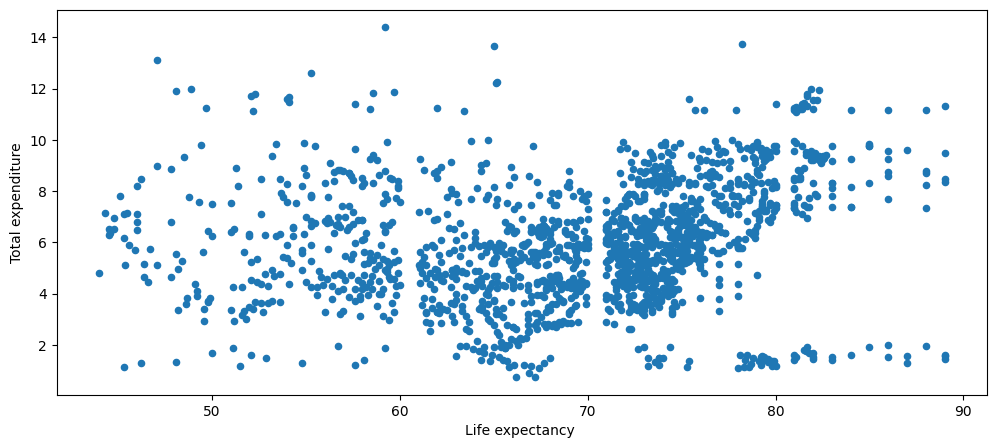

In [ ]:
data1.plot(x="Life expectancy ", y="Total expenditure", figsize=(12, 5), kind="scatter")

array([[<Axes: xlabel='Total expenditure', ylabel='Total expenditure'>,
        <Axes: xlabel='Life expectancy ', ylabel='Total expenditure'>,
        <Axes: xlabel='Adult Mortality', ylabel='Total expenditure'>,
        <Axes: xlabel='Alcohol', ylabel='Total expenditure'>,
        <Axes: xlabel='Schooling', ylabel='Total expenditure'>,
        <Axes: xlabel='Income composition of resources', ylabel='Total expenditure'>,
        <Axes: xlabel='infant deaths', ylabel='Total expenditure'>],
       [<Axes: xlabel='Total expenditure', ylabel='Life expectancy '>,
        <Axes: xlabel='Life expectancy ', ylabel='Life expectancy '>,
        <Axes: xlabel='Adult Mortality', ylabel='Life expectancy '>,
        <Axes: xlabel='Alcohol', ylabel='Life expectancy '>,
        <Axes: xlabel='Schooling', ylabel='Life expectancy '>,
        <Axes: xlabel='Income composition of resources', ylabel='Life expectancy '>,
        <Axes: xlabel='infant deaths', ylabel='Life expectancy '>],
       [<Axes: xlab

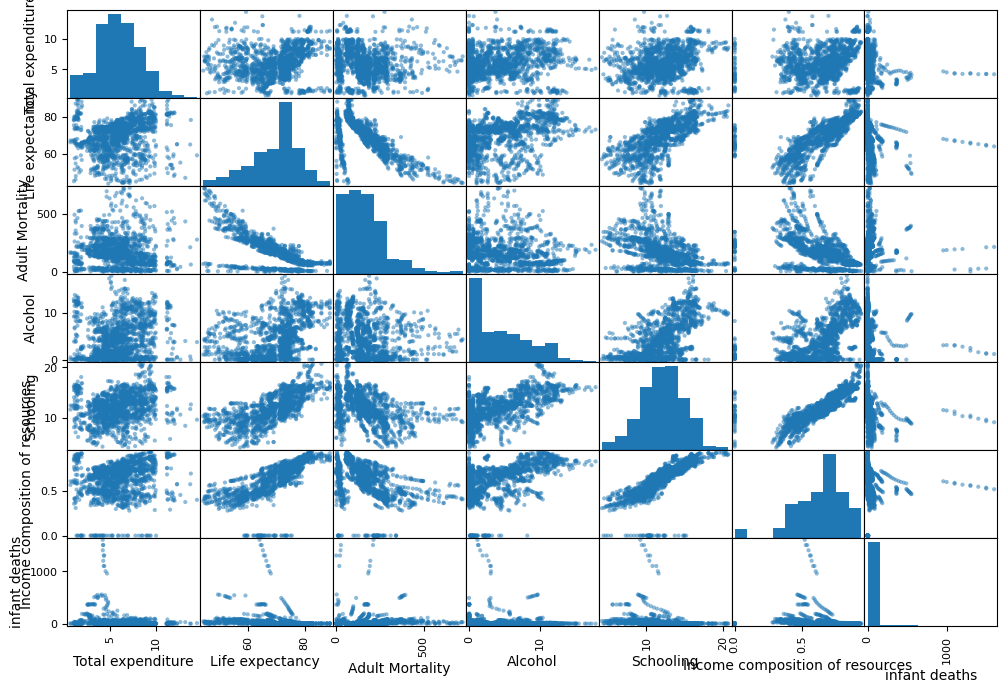

In [ ]:
pd.plotting.scatter_matrix(data1, figsize=(12, 8))

**Why Polynomial Regression Over Gaussian Processes (GP) or B-Splines?**

Gaussian Processes (GP):
Powerful for non-parametric regression but computationally expensive, scaling as O(n³) with data points.
Requires specifying a kernel function, which can be difficult to tune. More suited for problems with small to medium datasets and a strong prior on smoothness.

B-Splines:
Breaks data into piecewise polynomial segments, reducing overfitting. Needs careful knot selection; too few knots lead to underfitting, while too many lead to high variance.
Great for structured data but less interpretable in broad economic modeling.

Polynomial Regression:
Simple, interpretable, and computationally efficient.
Works well when relationships are inherently polynomial-like.
While higher degrees risk overfitting, cross-validation helps in degree selection. Appropriate for medium-sized datasets where global smoothness is preferred over localized fitting.

In [ ]:
print(data1.columns)

Index(['Total expenditure', 'Life expectancy ', 'Adult Mortality', 'Alcohol',
       'Schooling', 'Income composition of resources', 'infant deaths'],
      dtype='object')


In [ ]:
# Baseline model (Degree 1 - Linear)
model_poly_1 = bmb.Model("`Life expectancy ` ~ `Total expenditure`", data1) # Use backticks instead of Q()
idata_poly_1 = model_poly_1.fit()

Output()

In [ ]:
# Polynomial model (Degree 4)
model_poly_4 = bmb.Model("`Life expectancy ` ~ poly(`Total expenditure`, degree=4)", data1)
idata_poly_4 = model_poly_4.fit()

Output()

In [ ]:
# Polynomial model (Degree 7)
model_poly_7 = bmb.Model("`Life expectancy ` ~ poly(`Total expenditure`, degree=7)", data1)
idata_poly_7 = model_poly_7.fit()


Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


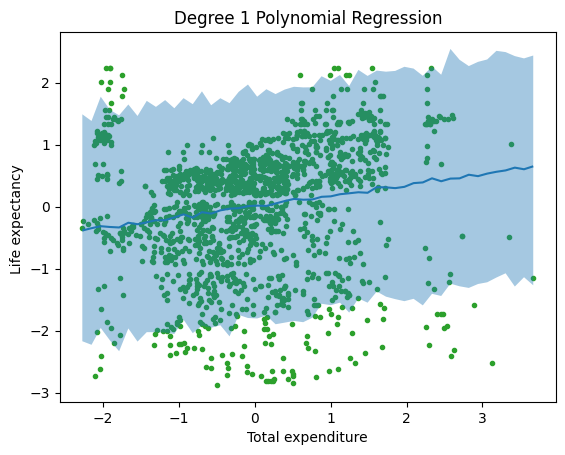

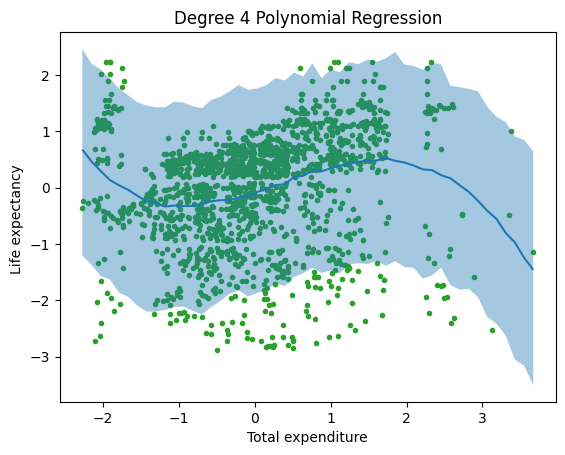

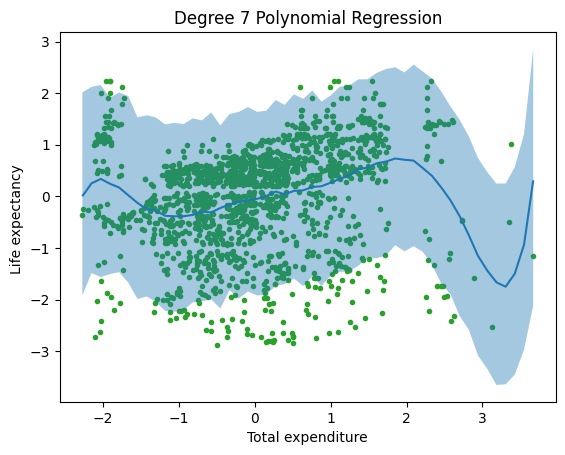

In [ ]:
# Plot results
bmb.interpret.plot_predictions(model_poly_1, idata_poly_1, "Total expenditure", pps=True)
plt.plot(data1['Total expenditure'], data1['Life expectancy '], "C2.", zorder=-3)
plt.title("Degree 1 Polynomial Regression")

bmb.interpret.plot_predictions(model_poly_4, idata_poly_4, "Total expenditure", pps=True)
plt.plot(data1['Total expenditure'], data1['Life expectancy '], "C2.", zorder=-3)
plt.title("Degree 4 Polynomial Regression")

bmb.interpret.plot_predictions(model_poly_7, idata_poly_7, "Total expenditure", pps=True)
plt.plot(data1['Total expenditure'], data1['Life expectancy '], "C2.", zorder=-3)
plt.title("Degree 7 Polynomial Regression")

plt.show()


Degree 1 Polynomial (Linear Regression):
The model captures a general trend but oversimplifies the relationship.
It assumes a strictly linear association, which may not be accurate given the complexity of real-world economic and health data.
Large residuals indicate a poor fit.

Degree 4 Polynomial:
Captures more curvature in the data.
Shows a noticeable dip and better adapts to non-linearity.
Reduces residuals in certain areas but introduces some oscillation.

Degree 7 Polynomial:
Fits the data even more closely.
Captures finer variations but introduces significant oscillations at the edges.
May overfit to noise in the data rather than capturing true underlying trends.

**Real Life Context**
1. Total Expenditure vs. Life Expectancy
Higher healthcare spending is generally linked to improved medical care and longer life expectancy. However, beyond a certain level, additional spending provides diminishing returns, as seen in countries like the U.S. where high expenditures do not always correlate with the highest life expectancy. A polynomial regression model captures this nonlinear trend better than a simple linear model, reflecting the saturation effect.

2. Adult Mortality vs. Life Expectancy
Adult mortality, the likelihood of a 15-year-old dying before 60, is inversely related to life expectancy. In countries with high adult mortality, improving healthcare can significantly boost life expectancy, but once mortality rates are already low, further reductions have minimal impact. A polynomial model is useful in capturing this threshold effect, where life expectancy initially increases rapidly with lower mortality before plateauing.

3. Alcohol Consumption vs. Life Expectancy
The effect of alcohol consumption on life expectancy is complex; moderate intake may have negligible or even slightly positive effects, while excessive drinking leads to severe health risks. The relationship is nonlinear—at low consumption levels, the impact on life expectancy is minimal, but beyond a critical threshold, the negative effects rise sharply. Polynomial regression helps model this turning point more accurately than a linear approach.

4. Schooling vs. Life Expectancy
Education strongly influences life expectancy by promoting health awareness and access to better economic opportunities. The impact is most pronounced at lower education levels, where even small increases in schooling lead to significant life expectancy gains, but it diminishes at higher levels. A polynomial model effectively captures this saturation effect, reflecting how education benefits plateau beyond a certain point.

5. Income Composition of Resources vs. Life Expectancy
Higher income improves healthcare, nutrition, and overall living conditions, leading to longer life expectancy, but the effect weakens as income rises. In lower-income regions, even modest gains significantly improve health outcomes, whereas in wealthier countries, additional income has a marginal effect. Polynomial regression is well-suited to model this diminishing return, where life expectancy rises steeply at first before leveling off.

6. Infant Deaths vs. Life Expectancy
Infant mortality is a key indicator of healthcare quality, with high rates linked to poor medical care and malnutrition. Reducing infant deaths leads to substantial life expectancy gains in developing countries, but in nations where rates are already low, further reductions have minimal impact. A polynomial model captures this strong initial effect followed by diminishing returns, whereas a linear model would fail to account for this nonlinear trend.